# Downloading FEMA NFIP Data for New York City

In [1]:
# importing libraries
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import urllib
import urllib.request
import requests
import matplotlib.pyplot as plt
import json
import time
import seaborn as sns

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
print('printing packages and versions:\n')

%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas,matplotlib

printing packages and versions:

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
geopandas : 0.11.1
matplotlib: 3.5.2



# County FIPS Codes for New York City

- The Bronx is Bronx County - FIPS 36005  
- Brooklyn is Kings County - FIPS 36047  
- Manhattan is New York County - FIPS 36061  
- Queens is Queens County - FIPS 36081  
- Staten Island is Richmond County - FIPS 36085

# Download Data by County FIPS

In [3]:
def county_download(county_fips):
    """
    Download FIMA NFIP policies data for a specific county and save it to a JSON file.

    Parameters:
    - county_fips (str): County FIPS code.

    Returns:
    - None
    """

    url_base = 'https://www.fema.gov/api/open/v2/FimaNfipPolicies?'
    format_param = '$format=json'
    metadata_param = '&$metadata=off'
    filter_param = '&$filter=countyCode%20eq%20%27{}%27'
    skip_param = '&$skip={}'
    top_param = '&$top=10000'

    url = url_base + format_param + metadata_param + filter_param + skip_param + top_param
    result_list = []
    skip = 0

    print('county fips: {}\n------------'.format(county_fips))

    while True:
        print('skip number: {}'.format(skip))
        
        # Make HTTP request and handle JSON response
        response = requests.get(url.format(county_fips, skip))
        data = response.json()

        # Check if the response is empty or contains an error
        if not data or 'FimaNfipPolicies' not in data:
            break

        # Process JSON data and extend the result list
        result_list.extend(data['FimaNfipPolicies'])

        rows = len(data['FimaNfipPolicies'])
        print('number of rows: {}'.format(rows))
        if rows < 10000:
            break

        print('result list length: {}'.format(len(result_list)))
        skip += 10000
        time.sleep(5)

    print('\nlength of full result list: {:,}\n'.format(len(result_list)))

    # Write the result list to a JSON file
    output_filename = f'data/policies-{county_fips}.json'
    with open(output_filename, 'w') as json_file:
        json.dump(result_list, json_file, indent=2)

In [4]:
%%time

county_download('36005')

county fips: 36005
------------
skip number: 0
number of rows: 10000
result list length: 10000
skip number: 10000
number of rows: 10000
result list length: 20000
skip number: 20000
number of rows: 10000
result list length: 30000
skip number: 30000
number of rows: 2314

length of full result list: 32,314

CPU times: user 4.49 s, sys: 528 ms, total: 5.02 s
Wall time: 25 s


In [5]:
%%time

county_download('36047')

county fips: 36047
------------
skip number: 0
number of rows: 10000
result list length: 10000
skip number: 10000
number of rows: 10000
result list length: 20000
skip number: 20000
number of rows: 10000
result list length: 30000
skip number: 30000
number of rows: 10000
result list length: 40000
skip number: 40000
number of rows: 10000
result list length: 50000
skip number: 50000
number of rows: 10000
result list length: 60000
skip number: 60000
number of rows: 10000
result list length: 70000
skip number: 70000
number of rows: 10000
result list length: 80000
skip number: 80000
number of rows: 10000
result list length: 90000
skip number: 90000
number of rows: 10000
result list length: 100000
skip number: 100000
number of rows: 10000
result list length: 110000
skip number: 110000
number of rows: 10000
result list length: 120000
skip number: 120000
number of rows: 10000
result list length: 130000
skip number: 130000
number of rows: 8688

length of full result list: 138,688

CPU times: user

In [6]:
%%time

county_download('36061')

county fips: 36061
------------
skip number: 0
number of rows: 10000
result list length: 10000
skip number: 10000
number of rows: 10000
result list length: 20000
skip number: 20000
number of rows: 10000
result list length: 30000
skip number: 30000
number of rows: 3858

length of full result list: 33,858

CPU times: user 4.6 s, sys: 491 ms, total: 5.09 s
Wall time: 48.2 s


In [7]:
%%time

county_download('36081')

county fips: 36081
------------
skip number: 0
number of rows: 10000
result list length: 10000
skip number: 10000
number of rows: 10000
result list length: 20000
skip number: 20000
number of rows: 10000
result list length: 30000
skip number: 30000
number of rows: 10000
result list length: 40000
skip number: 40000
number of rows: 10000
result list length: 50000
skip number: 50000
number of rows: 10000
result list length: 60000
skip number: 60000
number of rows: 10000
result list length: 70000
skip number: 70000
number of rows: 10000
result list length: 80000
skip number: 80000
number of rows: 10000
result list length: 90000
skip number: 90000
number of rows: 10000
result list length: 100000
skip number: 100000
number of rows: 10000
result list length: 110000
skip number: 110000
number of rows: 10000
result list length: 120000
skip number: 120000
number of rows: 10000
result list length: 130000
skip number: 130000
number of rows: 10000
result list length: 140000
skip number: 140000
numbe

In [8]:
%%time

county_download('36085')

county fips: 36085
------------
skip number: 0
number of rows: 10000
result list length: 10000
skip number: 10000
number of rows: 10000
result list length: 20000
skip number: 20000
number of rows: 10000
result list length: 30000
skip number: 30000
number of rows: 10000
result list length: 40000
skip number: 40000
number of rows: 10000
result list length: 50000
skip number: 50000
number of rows: 10000
result list length: 60000
skip number: 60000
number of rows: 10000
result list length: 70000
skip number: 70000
number of rows: 10000
result list length: 80000
skip number: 80000
number of rows: 10000
result list length: 90000
skip number: 90000
number of rows: 6280

length of full result list: 96,280

CPU times: user 13.1 s, sys: 1.4 s, total: 14.5 s
Wall time: 1min 53s


# Preview Full Data

In [3]:
%%time

path = 'data'
all_files = glob.glob(os.path.join(path, "*.json"))

df = pd.concat((pd.read_json(file) for file in all_files), ignore_index=True)
df = df.loc[:, df.columns[::-1]]

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (503873, 81)
CPU times: user 27.9 s, sys: 4.68 s, total: 32.6 s
Wall time: 32.7 s


,id,longitude,latitude,censusBlockGroupFips,censusTract,countyCode,reportedZipCode,reportedCity,propertyState,femaRegion,...,elevatedBuildingIndicator,contentsDeductibleCode,buildingDeductibleCode,crsClassCode,construction,condominiumCoverageTypeCode,cancellationDateOfFloodPolicy,basementEnclosureCrawlspaceType,baseFloodElevation,agricultureStructureIndicator
0,378d7e75-1e2b-4812-96c1-b7ab68868e12,-74.0,40.7,3.606101e+11,3.606101e+10,36061,10011,Currently Unavailable,NY,2.0,...,False,0,0,NaN,False,N,None,NaN,NaN,False
1,33244cc5-c9b3-4477-99de-8984156bd31a,-74.0,40.7,3.606101e+11,3.606101e+10,36061,10012,Currently Unavailable,NY,2.0,...,False,0,0,NaN,False,N,None,2.0,NaN,False
2,3e0fd718-7971-4a6f-8e9b-41f4c121780d,-74.0,40.7,3.606101e+11,3.606101e+10,36061,10011,Currently Unavailable,NY,2.0,...,False,0,0,NaN,False,N,None,NaN,NaN,False
3,d3b936e9-f948-4d20-adb6-fd698faf3417,-73.9,40.8,NaN,NaN,36061,,Currently Unavailable,MS,4.0,...,False,1,1,NaN,False,N,None,NaN,NaN,False
4,994f96b6-eaaa-49d3-b44f-c9e742948dd7,-74.0,40.7,3.606101e+11,3.606101e+10,36061,10001,Currently Unavailable,NY,2.0,...,False,1,0,NaN,False,N,None,2.0,NaN,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503873 entries, 0 to 503872
Data columns (total 81 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      503873 non-null  object 
 1   longitude                               503873 non-null  float64
 2   latitude                                503873 non-null  float64
 3   censusBlockGroupFips                    501727 non-null  float64
 4   censusTract                             501727 non-null  float64
 5   countyCode                              503873 non-null  int64  
 6   reportedZipCode                         503873 non-null  object 
 7   reportedCity                            503873 non-null  object 
 8   propertyState                           503873 non-null  object 
 9   femaRegion                              503872 non-null  float64
 10  floodZoneCurrent                        3736

# Sample Plot

In [5]:
df['policyEffectiveYear'] = pd.to_datetime(df['policyEffectiveDate'], errors='coerce').dt.year

bar_df = (
    df.groupby(by='policyEffectiveYear')['id']
    .count()
    .reset_index()
    .rename(columns={'id':'count'})
    .astype({'policyEffectiveYear':'int'})
    .sort_values(by='policyEffectiveYear')
)

bar_df

,policyEffectiveYear,count
0,2009,26513
1,2010,26027
2,2011,26635
3,2012,28320
4,2013,40412
5,2014,38404
6,2015,38066
7,2016,37657
8,2017,37033
9,2018,36250


In [7]:
bar_df = bar_df.iloc[:-1, :]

bar_df

,policyEffectiveYear,count
0,2009,26513
1,2010,26027
2,2011,26635
3,2012,28320
4,2013,40412
5,2014,38404
6,2015,38066
7,2016,37657
8,2017,37033
9,2018,36250


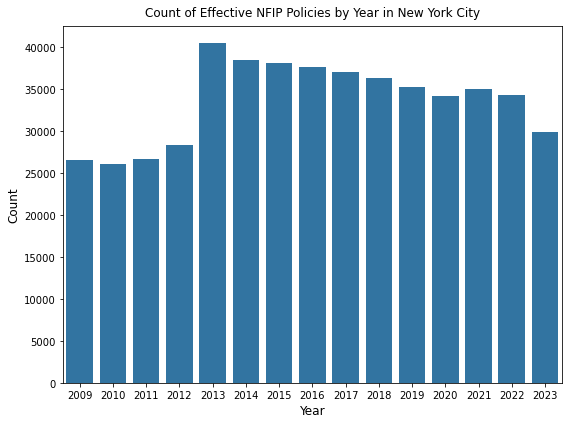

In [8]:
plt.figure(figsize=(8, 6))

sns.barplot(x=bar_df['policyEffectiveYear'], y=bar_df['count'], color='#1f77b4')

label = 'Count of Effective NFIP Policies by Year in New York City'
plt.title(label, fontsize=12, pad=10)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.savefig('figures/cover-photo.png', bbox_inches='tight', dpi=250)